# Inverse properties of transmission matrix

Here we explore the form of the inverse of the transmission matrix for various structures and values of Z.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plotlogf, plotlogf_real
plt.style.use('dark_background')
%matplotlib widget

## Basic 3 layer guide

In [2]:
A = SlabExact(ns=[1.4, 1.5, 1.4], Ts=[1, 1, 1], wl=.9e-6, symmetric=True,   # Need symmetric interfaces for properties to hold
              scale=1e-6)  

### Inverse and Conjugacy

Current guess is that 

$$M(Z) \bar{M}(\bar{Z})= I$$

for any $Z \in \mathbb{C}$ whenever waveguide is symmetric.  We know this is true for $Z \in \mathbb{R}.$  Hard to tell if issues below are due to numerical pollution.





In [3]:
Z = .0001
M = A.transmission_matrix_Z(Z)
M_star = A.transmission_matrix_Z(Z.conjugate())
M.conj() @ M_star, np.linalg.norm(M.conj() @ M_star - np.eye(2))

(array([[ 1.00000000e+00+1.22672645e-08j, -5.27819298e-09-2.94676283e-10j],
        [ 5.27390299e-09-2.48292054e-08j,  9.99999995e-01-1.22709025e-08j]]),
 3.1560579751756566e-08)

In [4]:
def check_inverse(Z, slab=A):
    M = slab.transmission_matrix_Z(Z)
    M_star = slab.transmission_matrix_Z(Z.conjugate())
    return np.linalg.norm(M.conj() @ M_star - np.eye(2))+1

In [5]:
check_inverse(15 + 15j)

1.0006735805450107

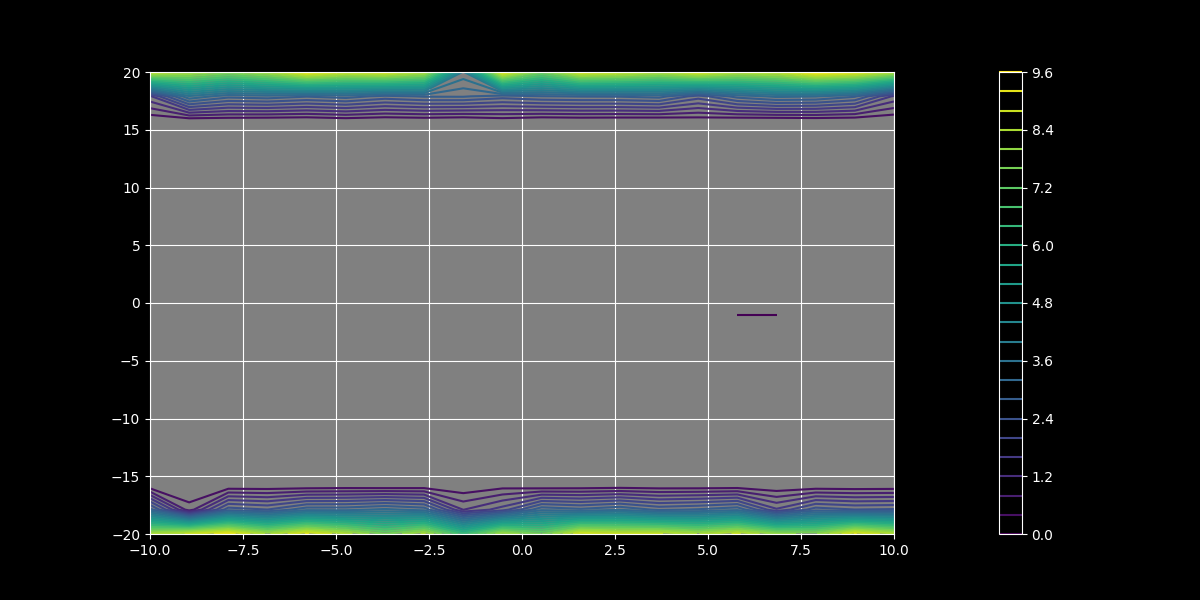

In [6]:
plotlogf(check_inverse, -10, 10, -20, 20, loop=True)

## Antiguide

In [7]:
B = SlabExact(ns=[2, 1, 2], Ts=[1, 1, 1], symmetric=True)


In [8]:
Z = 1
M = B.transmission_matrix_Z(Z)
M_star = B.transmission_matrix_Z(Z.conjugate())
M.conj() @ M_star, np.linalg.norm(M.conj() @ M_star - np.eye(2))

(array([[ 1.00000000e+00+0.j,  1.60858893e-11+0.j],
        [-1.60858893e-11+0.j,  1.00000000e+00+0.j]]),
 1.0737290154528114e-10)

In [9]:
check_inverse(2, B)

1.0000000000166402

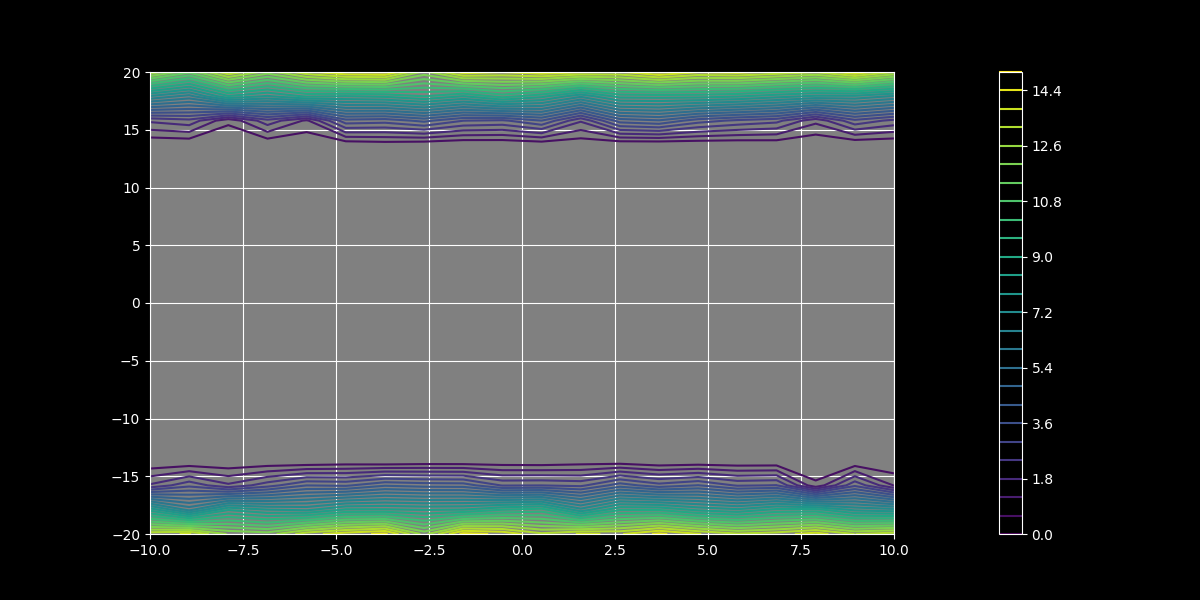

In [10]:
plotlogf(check_inverse, -10, 10, -20, 20, B, loop=True,)

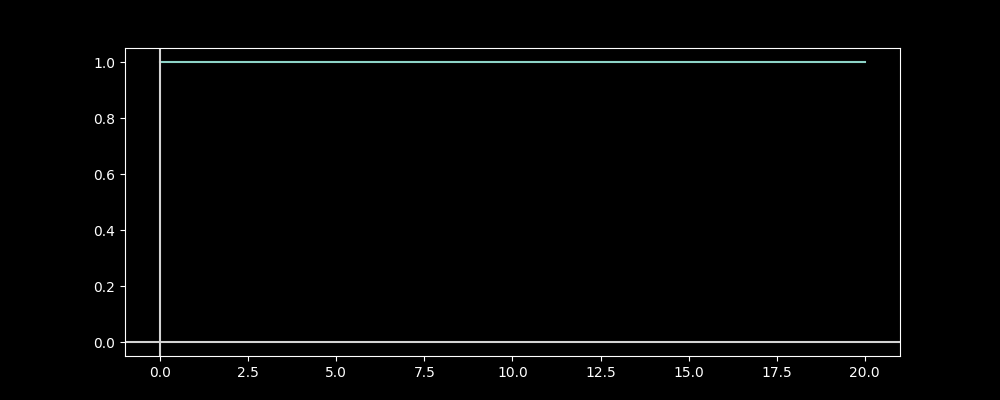

In [18]:
plotlogf_real(check_inverse, 0.001, 20,  A, loop=True, abs_off=True);

## Non-symmetric guide

In [19]:
C = SlabExact(ns=[1, 2, 2.5, 1], Ts = [1, 2, 2, 1], xrefs=[100, 100, 100, 100], scale=1e-6,
             wl=1.8e-6)  

In [20]:
Z = 1 
M = C.transmission_matrix_Z(Z)
M_star = C.transmission_matrix_Z(Z.conjugate())
M.conj() @ M_star, np.linalg.norm(M.conj() @ M_star - np.eye(2))

(array([[1.48840683-0.4661974j , 1.15729428+0.30555664j],
        [1.15729428-0.30555664j, 1.48840683+0.4661974j ]]),
 1.943489722346305)

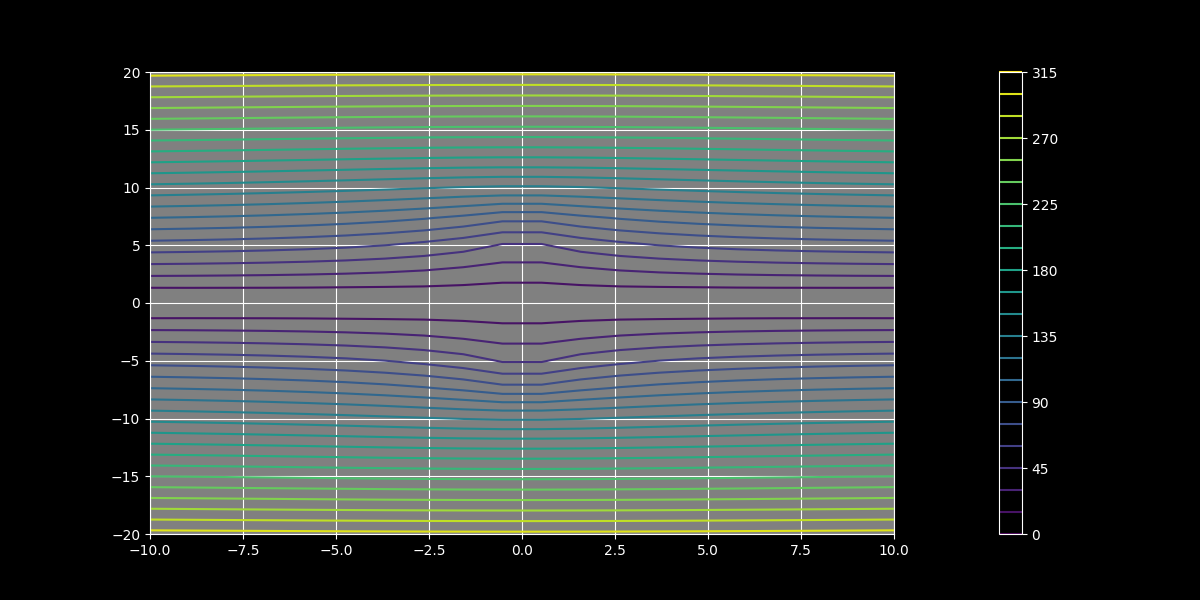

In [21]:
plotlogf(check_inverse, -10, 10, -20, 20, C, loop=True,)